In [1]:
import numpy as np
from transform_helpers import *
# %gui qt5
# from spimagine import volshow

In [2]:
# Z, Y, X
test_vol = np.zeros((200,400,800), dtype = np.uint16)

In [3]:
# put origin in the centre
imprint_coordinate_system(test_vol, ( 100, 200, 400))

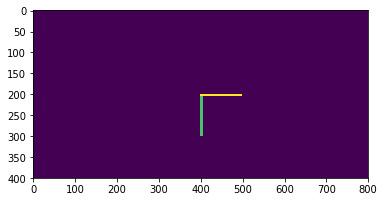

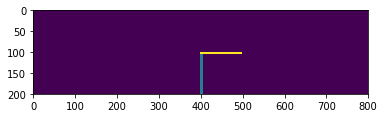

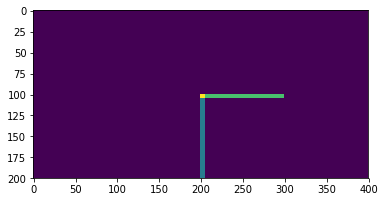

In [4]:
plot_all(get_projections(test_vol))

In [5]:
# volshow(test_vol)

In [6]:
import gputools
import scipy.ndimage

In [7]:
move_z = np.eye(4)
move_z[0,3]  = -100
move_z

array([[   1.,    0.,    0., -100.],
       [   0.,    1.,    0.,    0.],
       [   0.,    0.,    1.,    0.],
       [   0.,    0.,    0.,    1.]])

#  scipy expects the affine transform matrix from output to input, i.e. the inverse of the transformation we want to perform.

In the development branch of gputools this is now also the case.

In [8]:
scipy_trans_mz_inv = scipy.ndimage.affine_transform(test_vol, scipy.linalg.inv(move_z))

In [9]:
gpu_trans_mz_inv = gputools.affine(test_vol, scipy.linalg.inv(move_z))

c:\users\volker\anaconda3\envs\spimenv\lib\site-packages\gputools\transforms\transformations.py:48: UserWarning: gputools.transform.affine: API change as of gputools>= 0.2.8: the inverse of the matrix is now used as in scipy.ndimage.affine_transform
  warnings.warn("gputools.transform.affine: API change as of gputools>= 0.2.8: the inverse of the matrix is now used as in scipy.ndimage.affine_transform")


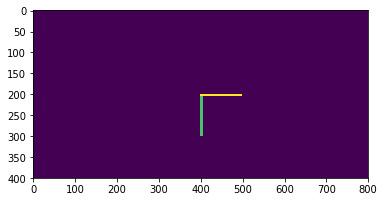

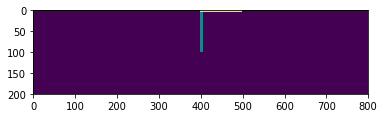

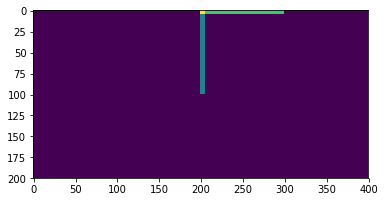

In [10]:
plot_all(get_projections(scipy_trans_mz_inv))

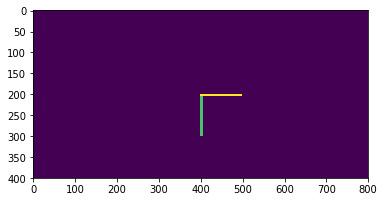

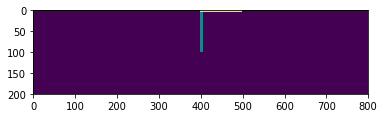

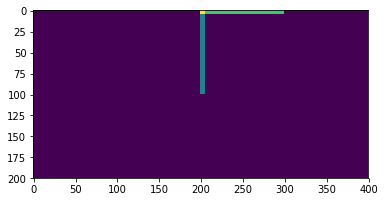

In [11]:
plot_all(get_projections(gpu_trans_mz_inv))

In [12]:
move_y = np.eye(4)
move_y[1,3]  = -200
move_y

array([[   1.,    0.,    0.,    0.],
       [   0.,    1.,    0., -200.],
       [   0.,    0.,    1.,    0.],
       [   0.,    0.,    0.,    1.]])

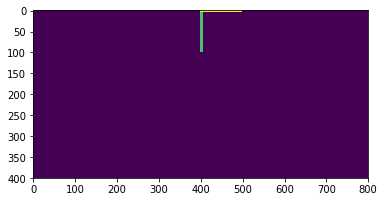

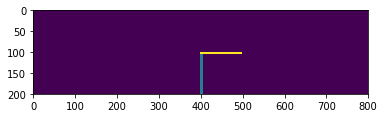

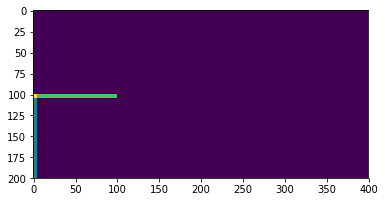

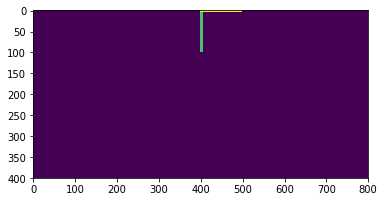

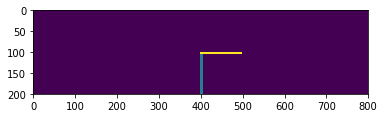

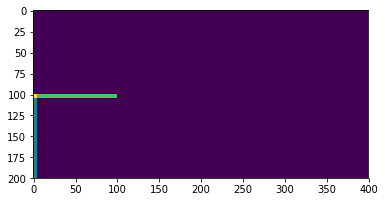

In [13]:
gpu_trans_my_inv = scipy.ndimage.affine_transform(test_vol, scipy.linalg.inv(move_y))
scipy_trans_my_inv = scipy.ndimage.affine_transform(test_vol, scipy.linalg.inv(move_y))
plot_all(get_projections(gpu_trans_my_inv))
plot_all(get_projections(scipy_trans_my_inv))

In [14]:
move_x = np.eye(4)
move_x[2,3]  = -400
move_x

array([[   1.,    0.,    0.,    0.],
       [   0.,    1.,    0.,    0.],
       [   0.,    0.,    1., -400.],
       [   0.,    0.,    0.,    1.]])

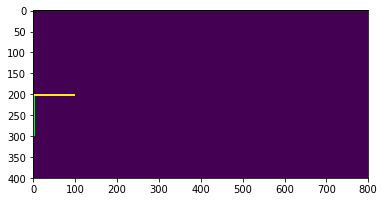

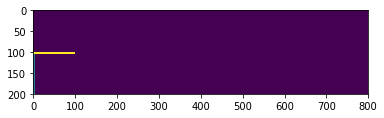

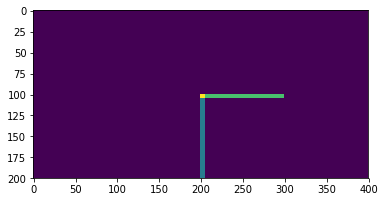

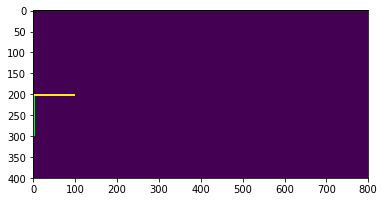

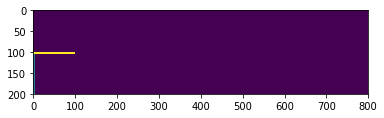

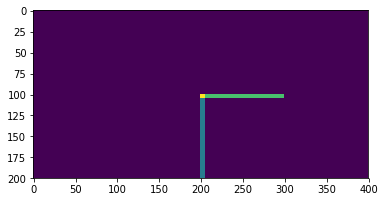

In [15]:
gpu_trans_mx_inv = scipy.ndimage.affine_transform(test_vol, scipy.linalg.inv(move_x))
scipy_trans_mx_inv = scipy.ndimage.affine_transform(test_vol, scipy.linalg.inv(move_x))
plot_all(get_projections(gpu_trans_mx_inv))
plot_all(get_projections(scipy_trans_mx_inv))